In [38]:
from skimage import io
from sklearn.cluster import KMeans
import numpy as np
from matplotlib import pylab as plt

%matplotlib inline

(128, 128, 3)

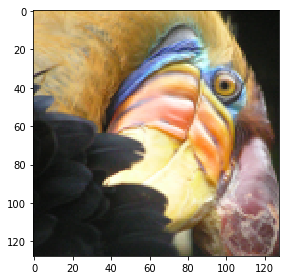

In [2]:
image = io.imread('./data/bird_small.png')
io.imshow(image)
image.shape

In [52]:
flat_image = image.reshape(128 * 128, 3) / 255
flat_image.shape

(16384, 3)

In [53]:
kmeans = KMeans(n_clusters=16, n_init=100, max_iter=300, n_jobs=1)
kmeans.fit(flat_image)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=16, n_init=100, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [54]:
clusters = kmeans.predict(flat_image)
clusters.shape

(16384,)

In [55]:
centers = kmeans.cluster_centers_
centers.shape

(16, 3)

In [56]:
compress_flat_image = centers[clusters]
compress_image = compress_flat_image.reshape(128, 128, 3)
compress_image.shape

(128, 128, 3)

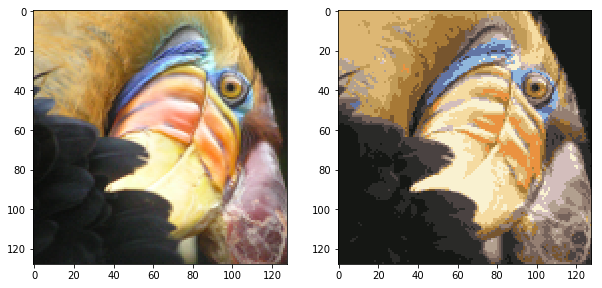

In [57]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.imshow(compress_image)